Found 1891 images belonging to 3 classes.
Found 0 images belonging to 1 classes.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                       

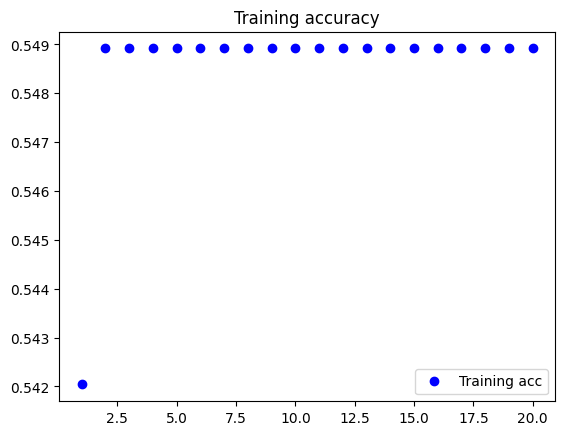

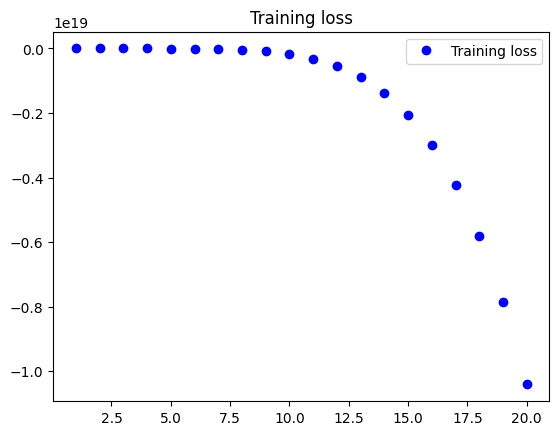

1/1 [==============================] - 0s 153ms/step
Tahmin: 1 (not-edible)


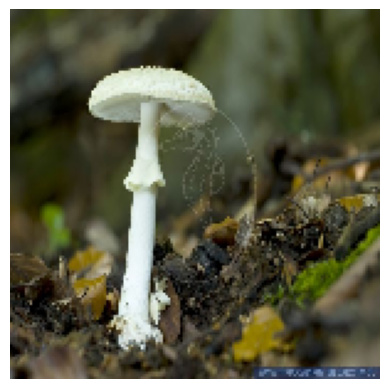

1/1 [==============================] - 0s 31ms/step
Tahmin: 1 (not-edible)


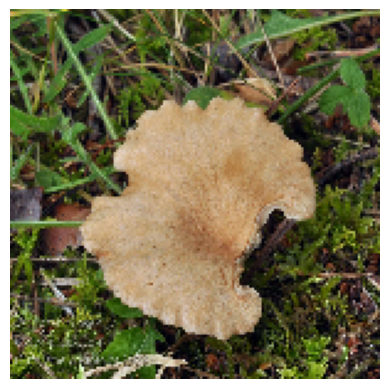

1/1 [==============================] - 0s 49ms/step
Tahmin: 1 (not-edible)


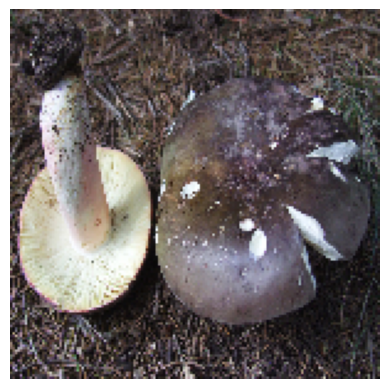

1/1 [==============================] - 0s 55ms/step
Tahmin: 1 (not-edible)


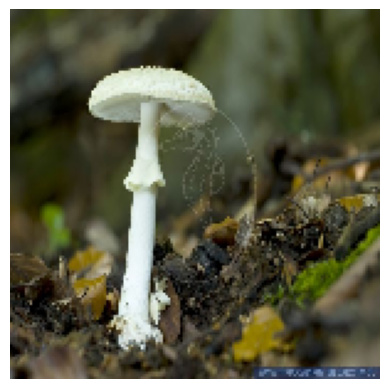

In [4]:
# -*- coding: utf-8 -*-
"""Untitled7.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/19WImzuHqZU9cUVtrLnVjfAdMwdVCO3ZI
"""

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image

# Gerekli kütüphanelerin yüklenmesi
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Veri setinin yüklenmesi ve hazırlanması
train_dir = '/content/drive/MyDrive/data/train'
test_dir = '/content/drive/MyDrive/data/test'


# Veri artırma (data augmentation) işlemi için ImageDataGenerator oluşturma
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Veri yükleyici oluşturma
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

# Modelin oluşturulması
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

# Modelin derlenmesi
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Modelin eğitilmesi
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20
)

# Sonuçların değerlendirilmesi
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()

# Rastgele bir resim seçme
import random

random_test_image_path = random.choice(os.listdir(test_dir))

# Seçilen resmi model ile tahmin etme
img_path = os.path.join(test_dir, random_test_image_path)
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

prediction = model.predict(img_tensor)

# Tahmin sonucunu ekrana yazdırma
if prediction < 0.5:
    print("Tahmin: 0 (edible)")
else:
    print("Tahmin: 1 (not-edible)")

# Resmi gösterme
plt.imshow(img)
plt.axis('off')
plt.show()

random_test_image_path = random.choice(os.listdir(test_dir))

# Seçilen resmi model ile tahmin etme
img_path = os.path.join(test_dir, random_test_image_path)
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

prediction = model.predict(img_tensor)

# Tahmin sonucunu ekrana yazdırma
if prediction < 0.5:
    print("Tahmin: 0 (edible)")
else:
    print("Tahmin: 1 (not-edible)")

# Resmi gösterme
plt.imshow(img)
plt.axis('off')
plt.show()

random_test_image_path = random.choice(os.listdir(test_dir))

# Seçilen resmi model ile tahmin etme
img_path = os.path.join(test_dir, random_test_image_path)
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

prediction = model.predict(img_tensor)

# Tahmin sonucunu ekrana yazdırma
if prediction < 0.5:
    print("Tahmin: 0 (edible)")
else:
    print("Tahmin: 1 (not-edible)")

# Resmi gösterme
plt.imshow(img)
plt.axis('off')
plt.show()

random_test_image_path = random.choice(os.listdir(test_dir))

# Seçilen resmi model ile tahmin etme
img_path = os.path.join(test_dir, random_test_image_path)
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

prediction = model.predict(img_tensor)

# Tahmin sonucunu ekrana yazdırma
if prediction < 0.5:
    print("Tahmin: 0 (edible)")
else:
    print("Tahmin: 1 (not-edible)")

# Resmi gösterme
plt.imshow(img)
plt.axis('off')
plt.show()